In [1]:
print("hello world")

hello world


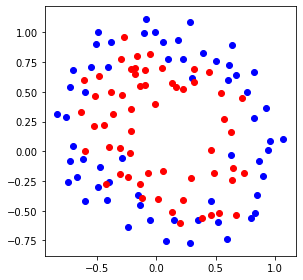

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


X = np.append(np.append(np.append(np.append( np.asarray([1]*118) , pointX) , pointY), pointX**2), pointY**2)
X = np.append(np.append(np.append(np.append(X, pointX**3),pointY**3), pointX**4),pointY**4)
X = np.reshape(X, (9, len(pointX)))


$$g(x, y, \theta) = \theta_0 + \theta_1 x + \theta_2 y + \theta_3 x^2 + \theta_4 y^2 $$

In [ ]:
setaN = 9
seta = np.asarray([0.1] * setaN)
np.reshape(seta, (setaN, 1))
err_list = []

lr = 0.002
epochs = 2000000
A = None
M = len(pointX)

for i in range(epochs):
    #forpass
    Z = np.dot(seta, X)
    A = 1/(1+np.exp(-Z))
    ERR = -(label-A)
    
    #backprop
    for k in range(setaN):
        seta[k] -= lr * np.sum(ERR * X[k]) / M
    
    #history
    A = np.clip(A, 1e-10, 1-1e-10)
    
    loss = np.sum(-(label*np.log(A) + (1-label)*np.log(1-A)))/M
    err_list.append(loss)

In [18]:
correct = 0
for i, a in enumerate(A):
    if a <= 0.5 and label[i] == 0 :
        correct += 1
    elif a > 0.5 and label[i] == 1:
        correct += 1

print(correct)

95


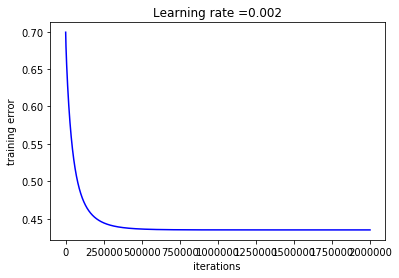

In [19]:
plt.plot(np.squeeze(err_list[600:]), color='b')
plt.ylabel('training error')
plt.xlabel('iterations ')
plt.title("Learning rate =" + str(lr))
plt.show()